In [1]:
import json
import time
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
from citipy import citipy as cp

In [2]:
cities = []
count = 0
duplicate = False

for x in range(-100,100,1):
    for y in range(-200,200,1):
        city = cp.nearest_city(x, y)
        city_dict = {}
        city_dict['city'] = city.city_name
        city_dict['country'] = city.country_code
        city_dict['lat'] = x
        city_dict['long'] = y
        if len(cities) == 0:
            cities.append(city_dict)
            count+=1
            continue
        else:
            for city in cities:
                if city['city'] == city_dict['city']:
                    duplicate = True
        if duplicate == False:
            cities.append(city_dict)
            count+=1
        else:
            duplicate = False

print(len(cities))

7957


In [3]:
print(cities[0])

{'city': 'vaini', 'country': 'to', 'lat': -100, 'long': -200}


In [4]:
city_df = pd.DataFrame({
    'city': [x['city'] for x in cities],
    'country': [x['country'] for x in cities],
})
city_df.head()

,city,country
0,vaini,to
1,mataura,pf
2,rikitea,pf
3,punta arenas,cl
4,ushuaia,ar


In [5]:
sample_city = city_df.sample(500)
sample_city.head()

,city,country
974,samarai,pg
2282,amparai,lk
592,manyana,bw
2095,port harcourt,ng
5342,coldwater,us


In [6]:
apikey = 'Your API Key Here'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
sample_city['latitude'] = ""
sample_city['longitude'] = ""
sample_city['temperature'] = ""
sample_city['humidity'] = ""
sample_city['cloudiness'] = ""
sample_city['wind_speed'] = ""

for index,row in sample_city.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather = req.get(query_url)
        city_weather = weather.json()
        sample_city.set_value(index, "latitude", int(city_weather['coord']['lat']))
        sample_city.set_value(index, "longitude", int(city_weather['coord']['lat']))
        sample_city.set_value(index, "temperature", int(city_weather['main']['temp']))
        sample_city.set_value(index, "humidity", int(city_weather['main']['humidity']))
        sample_city.set_value(index, "cloudiness", int(city_weather['clouds']['all']))
        sample_city.set_value(index, "wind_speed", int(city_weather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

No data for this city: samarai
This is city#: 1
This is: samarai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Your API Key Here&units=Imperial&q=samarai
No data for this city: amparai
This is city#: 2
This is: amparai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Your API Key Here&units=Imperial&q=amparai
No data for this city: manyana
This is city#: 3
This is: manyana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Your API Key Here&units=Imperial&q=manyana
No data for this city: port harcourt
This is city#: 4
This is: port harcourt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Your API Key Here&units=Imperial&q=port harcourt
No data for this city: coldwater
This is city#: 5
This is: coldwater
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Your API Key Here&units=Imperial&q=coldwater
No data for this city: ouadda
This i

In [7]:
sample_city = sample_city[sample_city.latitude != ""]
sample_city

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed


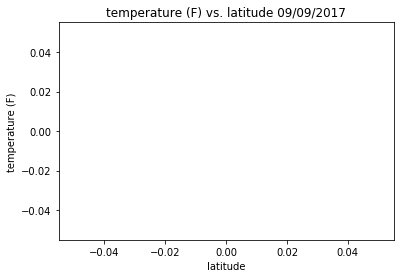

In [8]:
date = time.strftime("%m/%d/%Y")
plt.scatter(sample_city['latitude'],sample_city['temperature'])
plt.title(f"temperature (F) vs. latitude {date}")
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.style.use('ggplot')
plt.savefig("temperature.png")
plt.show()

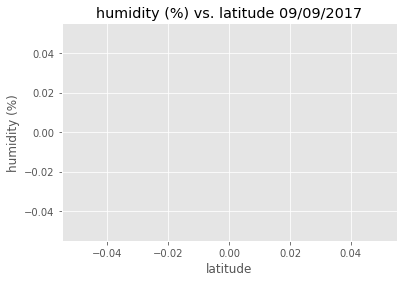

In [9]:
plt.scatter(sample_city['latitude'], sample_city['humidity'])
plt.title(f"humidity (%) vs. latitude {date}")
plt.xlabel("latitude")
plt.ylabel("humidity (%)")
plt.style.use('ggplot')
plt.savefig("humidity.png")
plt.show()

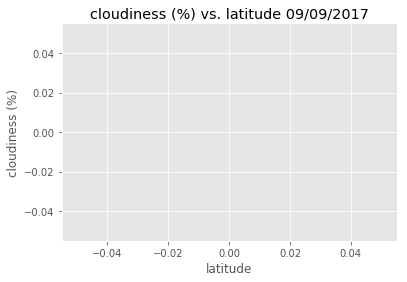

In [10]:
plt.scatter(sample_city['latitude'], sample_city['cloudiness'])
plt.title(f"cloudiness (%) vs. latitude {date}")
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("cloudiness.png")
plt.show()

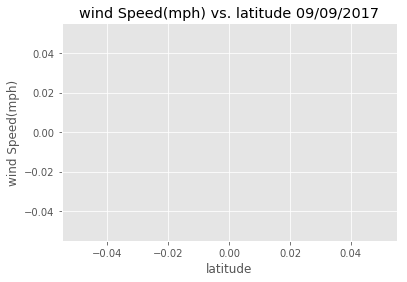

In [11]:
plt.scatter(sample_city['latitude'], sample_city['wind_speed'])
plt.title(f"wind Speed(mph) vs. latitude {date}")
plt.xlabel("latitude")
plt.ylabel("wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("wind_speed.png")
plt.show()

In [12]:
sample_city.to_csv("sample_weather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sample_weather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
